<center><h1>Chen_PoHao_HW3</h1></center>
<br>
<br>

Name: Po Hao Chen
<br>
Github Username: pohaoc29
<br>
USC ID: 4213309111

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download Data

Package imports

In [1]:
import os,sys
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Get the AReM Data Set

In [2]:
# bending1: 7 datasets
path = '../data/AReM/bending1/'
files = os.listdir(path)
bending1_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

bending1_dflist = []
for file_item in bending1_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    bending1_dflist.append(temp)



# bending2_df: 6
path = '../data/AReM/bending2/'
files = os.listdir(path)
bending2_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

bending2_dflist = []
for file_item in bending2_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    bending2_dflist.append(temp)


# cycling: 15
path = '../data/AReM/cycling/'
files = os.listdir(path)
cycling_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

cycling_dflist = []
for file_item in cycling_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    cycling_dflist.append(temp)
    

# lying: 15
path = '../data/AReM/lying/'
files = os.listdir(path)
lying_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

lying_dflist = []
for file_item in lying_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    lying_dflist.append(temp)

    
# sitting: 15
path = '../data/AReM/sitting/'
files = os.listdir(path)
sitting_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

sitting_dflist = []
for file_item in sitting_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    sitting_dflist.append(temp)
    
#standing: 15
path = '../data/AReM/standing/'
files = os.listdir(path)
standing_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

standing_dflist = []
for file_item in standing_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    standing_dflist.append(temp)


#walking: 15
path = '../data/AReM/walking/'
files = os.listdir(path)
walking_csv = list(sorted(filter(lambda x:(x[0:7] == 'dataset' and x[-4:] == '.csv'),files)))

walking_dflist = []
for file_item in walking_csv:
    temp = pd.read_csv(path + file_item, header=4)
    temp.rename(columns = {'# Columns: time':'time'}, inplace = True)
    walking_dflist.append(temp)

There is a camma in the end of cycling/dataset9.csv and cycling/dataset14.csv causing error, so I removed them manually.

### (b) Test and Train Data

After I split the train and test data, I checked my train data, I found out that the type of time column became an object, and 480 data were missing in six time series, respectively, so I went back and checked each training data and found out it causes in bending2 data.

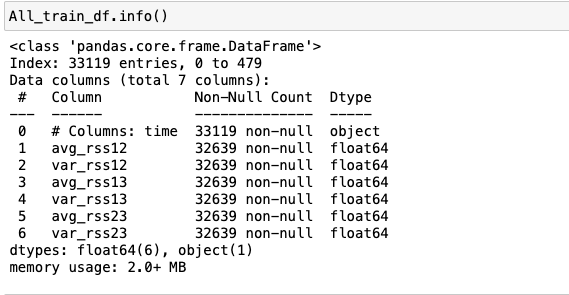

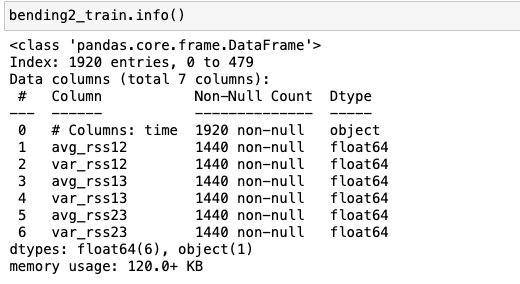

Go deeper and found that the problem is in dataset4 in bending2 folder.

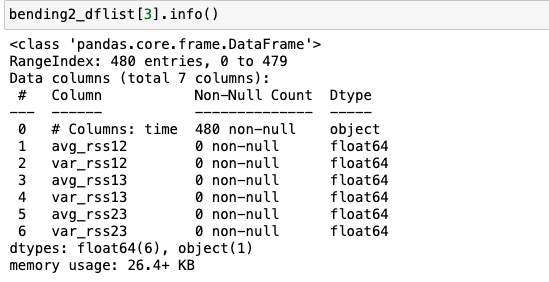

When checking dataset4 in bending2, we can see that the data overlap in the first column in each row.

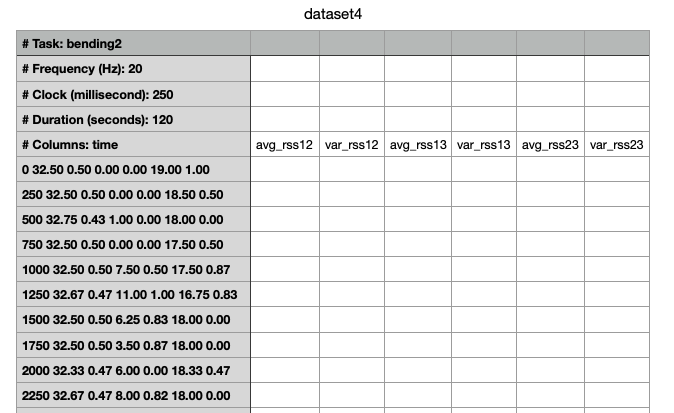

Preprocess the data again.

In [3]:
new = bending2_dflist[3]['time'].str.split(" ",n=6,expand=True)
bending2_dflist[3]['time'] = new[0]
bending2_dflist[3]['avg_rss12'] = new[1]
bending2_dflist[3]['var_rss12'] = new[2]
bending2_dflist[3]['avg_rss13'] = new[3]
bending2_dflist[3]['var_rss13'] = new[4]
bending2_dflist[3]['avg_rss23'] = new[5]
bending2_dflist[3]['var_rss23'] = new[6]

In [4]:
bending2_dflist[3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   time       480 non-null    object
 1   avg_rss12  480 non-null    object
 2   var_rss12  480 non-null    object
 3   avg_rss13  480 non-null    object
 4   var_rss13  480 non-null    object
 5   avg_rss23  480 non-null    object
 6   var_rss23  480 non-null    object
dtypes: object(7)
memory usage: 26.4+ KB


In [5]:
bending2_dflist[3] = bending2_dflist[3].astype('float64')
bending2_dflist[3]['time'] = bending2_dflist[3]['time'].astype('int64')

bending2_dflist[3]

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,32.50,0.50,0.00,0.00,19.00,1.00
1,250,32.50,0.50,0.00,0.00,18.50,0.50
2,500,32.75,0.43,1.00,0.00,18.00,0.00
3,750,32.50,0.50,0.00,0.00,17.50,0.50
4,1000,32.50,0.50,7.50,0.50,17.50,0.87
...,...,...,...,...,...,...,...
475,118750,28.67,0.47,4.67,1.25,17.33,0.47
476,119000,27.50,0.50,5.50,2.50,17.25,1.30
477,119250,28.00,0.00,6.67,0.94,17.00,1.00
478,119500,28.00,0.00,5.00,0.82,17.00,0.71


In [6]:
bending2_dflist[3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       480 non-null    int64  
 1   avg_rss12  480 non-null    float64
 2   var_rss12  480 non-null    float64
 3   avg_rss13  480 non-null    float64
 4   var_rss13  480 non-null    float64
 5   avg_rss23  480 non-null    float64
 6   var_rss23  480 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 26.4 KB


### when checking the training data set

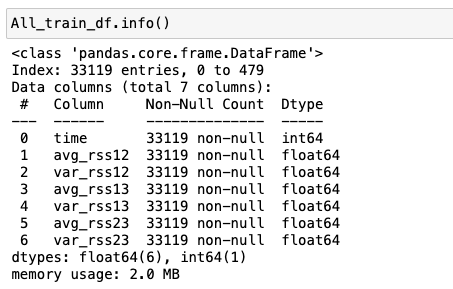

There is one row missing. Should be (88(all datasets) - 19(test datasets))datasets * 480data in each set = 33120.

In [7]:
sitting_dflist[13]

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,44.00,0.71,18.75,0.43,7.75,1.30
1,250,44.00,0.00,18.50,0.50,8.67,0.47
2,500,43.75,0.83,18.00,0.00,9.67,0.94
3,750,43.75,0.43,18.25,0.43,9.00,0.00
4,1000,43.75,0.43,18.00,0.00,9.00,0.00
...,...,...,...,...,...,...,...
474,118750,42.25,0.43,18.00,0.00,16.50,1.12
475,119000,42.00,0.00,18.00,0.00,16.00,0.82
476,119250,42.50,0.50,18.00,0.00,15.25,0.43
477,119500,42.50,0.50,18.25,0.43,16.00,1.22


In [8]:
sitting_csv

['dataset1.csv',
 'dataset10.csv',
 'dataset11.csv',
 'dataset12.csv',
 'dataset13.csv',
 'dataset14.csv',
 'dataset15.csv',
 'dataset2.csv',
 'dataset3.csv',
 'dataset4.csv',
 'dataset5.csv',
 'dataset6.csv',
 'dataset7.csv',
 'dataset8.csv',
 'dataset9.csv']

#### Found that there is a row missing in sitting data set, and found it is in dataset8. When checking the dataset8, I found out that there is a missing value, which time should = 13500 in the middle of column 59 and 60(excel index number, in dataframe is column 53 and 54).

In [9]:
sitting_dflist[13].head(56)

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,44.00,0.71,18.75,0.43,7.75,1.30
1,250,44.00,0.00,18.50,0.50,8.67,0.47
2,500,43.75,0.83,18.00,0.00,9.67,0.94
3,750,43.75,0.43,18.25,0.43,9.00,0.00
4,1000,43.75,0.43,18.00,0.00,9.00,0.00
5,1250,44.00,0.00,18.25,0.43,10.00,0.00
6,1500,44.00,0.00,18.00,0.00,10.75,1.09
7,1750,43.50,0.50,18.00,0.00,11.00,0.71
8,2000,44.00,0.00,18.00,0.00,12.00,0.00
9,2250,43.50,0.50,18.00,0.00,12.00,0.00


In [10]:
sitting_dflist[13].mean()

time         59971.816284
avg_rss12       42.821983
var_rss12        0.335678
avg_rss13       17.199708
var_rss13        0.531190
avg_rss23       16.025658
var_rss23        0.856013
dtype: float64

In [11]:
sitting_dflist[13].quantile(0.5)

time         60000.00
avg_rss12       42.50
var_rss12        0.43
avg_rss13       18.00
var_rss13        0.43
avg_rss23       17.00
var_rss23        0.82
Name: 0.5, dtype: float64

#### To avoid unexpected errors when training the model, I decided to fill in data imputation by mean in this data set to this missing row's values. Since I did not observe exaggerated outliers, I chose the mean instead of the medium to make the data stick more to the original data.

In [12]:
sitting_dflist[13].loc[479] = [13500, sitting_dflist[13]['avg_rss12'].mean(), sitting_dflist[13]['var_rss12'].mean(), sitting_dflist[13]['avg_rss13'].mean(), sitting_dflist[13]['var_rss13'].mean(), sitting_dflist[13]['avg_rss23'].mean(), sitting_dflist[13]['var_rss23'].mean()]
sitting_dflist[13] = sitting_dflist[13].sort_values(by=['time'])
sitting_dflist[13].index = [i for i in range(0,480,1)]
sitting_dflist[13].head(56)

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.0,44.000000,0.710000,18.750000,0.43000,7.750000,1.300000
1,250.0,44.000000,0.000000,18.500000,0.50000,8.670000,0.470000
2,500.0,43.750000,0.830000,18.000000,0.00000,9.670000,0.940000
3,750.0,43.750000,0.430000,18.250000,0.43000,9.000000,0.000000
4,1000.0,43.750000,0.430000,18.000000,0.00000,9.000000,0.000000
5,1250.0,44.000000,0.000000,18.250000,0.43000,10.000000,0.000000
6,1500.0,44.000000,0.000000,18.000000,0.00000,10.750000,1.090000
7,1750.0,43.500000,0.500000,18.000000,0.00000,11.000000,0.710000
8,2000.0,44.000000,0.000000,18.000000,0.00000,12.000000,0.000000
9,2250.0,43.500000,0.500000,18.000000,0.00000,12.000000,0.000000


In [13]:
sitting_dflist[13]

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.0,44.00,0.71,18.75,0.43,7.75,1.30
1,250.0,44.00,0.00,18.50,0.50,8.67,0.47
2,500.0,43.75,0.83,18.00,0.00,9.67,0.94
3,750.0,43.75,0.43,18.25,0.43,9.00,0.00
4,1000.0,43.75,0.43,18.00,0.00,9.00,0.00
...,...,...,...,...,...,...,...
475,118750.0,42.25,0.43,18.00,0.00,16.50,1.12
476,119000.0,42.00,0.00,18.00,0.00,16.00,0.82
477,119250.0,42.50,0.50,18.00,0.00,15.25,0.43
478,119500.0,42.50,0.50,18.25,0.43,16.00,1.22


The row time = 13500 has been insert into data and the number of rows in dataset is correct.

do all over again

In [14]:
#test data : datasets 1 and 2 in bending1 and bending2 + datasets1,2,3 in other
#train data : rest

#train data
bending1_train = pd.concat(bending1_dflist[2:])
bending2_train = pd.concat(bending2_dflist[2:])
cycling_train = pd.concat(cycling_dflist[3:]) 
lying_train = pd.concat(lying_dflist[3:]) 
sitting_train = pd.concat(sitting_dflist[3:]) 
standing_train = pd.concat(standing_dflist[3:]) 
walking_train = pd.concat(walking_dflist[3:]) 

All_train_df = pd.concat([bending1_train, bending2_train, cycling_train, lying_train, sitting_train, standing_train, walking_train])


#test data
bending1_test = pd.concat(bending1_dflist[0:2])
bending2_test = pd.concat(bending2_dflist[0:2])
cycling_test = pd.concat(cycling_dflist[0:3])
lying_test = pd.concat(lying_dflist[0:3])
sitting_test = pd.concat(sitting_dflist[0:3])
standing_test = pd.concat(standing_dflist[0:3])
walking_test = pd.concat(walking_dflist[0:3])

All_test_df = pd.concat([bending1_test, bending2_test, cycling_test, lying_test, sitting_test, standing_test, walking_test])

In [15]:
All_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33120 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       33120 non-null  float64
 1   avg_rss12  33120 non-null  float64
 2   var_rss12  33120 non-null  float64
 3   avg_rss13  33120 non-null  float64
 4   var_rss13  33120 non-null  float64
 5   avg_rss23  33120 non-null  float64
 6   var_rss23  33120 non-null  float64
dtypes: float64(7)
memory usage: 2.0 MB


After the data pre-process, the training data is fine.

In [16]:
All_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9120 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       9120 non-null   int64  
 1   avg_rss12  9120 non-null   float64
 2   var_rss12  9120 non-null   float64
 3   avg_rss13  9120 non-null   float64
 4   var_rss13  9120 non-null   float64
 5   avg_rss23  9120 non-null   float64
 6   var_rss23  9120 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 570.0 KB


Test data is fine.

### (c) Feature Extraction

#### i. Research

Minimum: The smallest value of the time series data.<br>
Maximum: The largest value of the time series data.<br>
Range: Difference between the maximum and minimum values in the time series.<br>

Mean: The average value of the time series data.<br>
Median: The central value of the time series data.<br>

Standard deviation: Measure of the dispersion of values in the time series.<br>
Variance: Square of the standard deviation, representing the spread of the data points.<br>

First quartile: The value seatted on 25% of the time series data.<br>
Third quartile: The value seatted on 75% of the time series data.<br>
Interquartile range (IQR): Range between the first quartile (25th percentile) and the third quartile (75th percentile).<br>

Skewness: Measure of asymmetry of the distribution of values around the mean.<br>
Kurtosis: Measure of the "tailedness" or peakedness of the distribution of values.<br>

Root mean square (RMS): Square root of the arithmetic mean of the squares of the values in the time series.<br>
Mean absolute deviation (MAD): Mean of the absolute differences between each value and the mean of the time series.<br>

#### ii. Extraction

In [17]:
All_df = pd.concat([pd.concat(bending1_dflist[::1]), pd.concat(bending2_dflist[::1]), pd.concat(cycling_dflist[::1]), pd.concat(lying_dflist[::1]), pd.concat(sitting_dflist[::1]), pd.concat(standing_dflist[::1]), pd.concat(walking_dflist[::1])])

activities = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
activities_data = [7, 6, 15, 15, 15, 15, 15]
time_domain_features = ['min', 'max', 'mean', 'median', 'standard deviation', '1st quartile', '3rd quartile']
time_series = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
time_domain_of_six_time_series = pd.DataFrame()

count=0
time_domain_list = list()
for i in range(0,42240,480):
    count+=1
    time_domain_list.clear()
    for j in range(len(time_series)):
        Min = All_df[i:i+480][time_series[j]].min()
        Max = All_df[i:i+480][time_series[j]].max()
        Mean = All_df[i:i+480][time_series[j]].mean()
        Median = All_df[i:i+480][time_series[j]].median()
        SD = All_df[i:i+480][time_series[j]].std()
        FirstQ = All_df[i:i+480][time_series[j]].quantile(0.25)
        ThirdQ = All_df[i:i+480][time_series[j]].quantile(0.75)
        time_domain_list.extend([Min, Max, Mean, Median, SD, FirstQ, ThirdQ])
    
    time_domain_of_six_time_series = (pd.concat([time_domain_of_six_time_series, pd.DataFrame(time_domain_list).T], ignore_index=True))

time_domain_of_six_time_series.index.name = 'Instance'
time_domain_of_six_time_series.index = time_domain_of_six_time_series.index + 1
time_domain_of_six_time_series.columns = [time_domain_features[i%7]+str(int(i/7+1)) for i in range(42)]
time_domain_of_six_time_series

,min1,max1,mean1,median1,standard deviation1,1st quartile1,3rd quartile1,min2,max2,mean2,...,standard deviation5,1st quartile5,3rd quartile5,min6,max6,mean6,median6,standard deviation6,1st quartile6,3rd quartile6
Instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,45.00,40.624792,40.500,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.430,0.582915,0.00,1.3000
2,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.430,0.601010,0.00,1.3000
3,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400
4,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000
5,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050
85,21.50,51.00,34.935812,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000
86,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200


#### iii. Standard Deviation

In [18]:
time_domain_of_six_time_series.std()

min1                   9.569975
max1                   4.394362
mean1                  5.335718
median1                5.440054
standard deviation1    1.772166
1st quartile1          6.153590
3rd quartile1          5.138925
min2                   0.000000
max2                   5.062729
mean2                  1.574164
median2                1.412244
standard deviation2    0.884108
1st quartile2          0.946386
3rd quartile2          2.125266
min3                   2.956462
max3                   4.875137
mean3                  4.008380
median3                4.036396
standard deviation3    0.946695
1st quartile3          4.220658
3rd quartile3          4.171628
min4                   0.000000
max4                   2.183625
mean4                  1.166114
median4                1.145586
standard deviation4    0.458248
1st quartile4          0.843620
3rd quartile4          1.552504
min5                   6.124001
max5                   5.741238
mean5                  5.675593
median5 

In [19]:
from scipy.stats import bootstrap

ci_results ={}
for column in time_domain_of_six_time_series.columns:
    dev_std = time_domain_of_six_time_series[column].std()
    data = (time_domain_of_six_time_series[column],)
    
    res = bootstrap(data, np.std, confidence_level=0.90, n_resamples=10000)
    ci_results[column] = res.confidence_interval
    
column_result = list()    
for column, ci in ci_results.items():
    column_result.append([column, time_domain_of_six_time_series[column].std(), ci])
    #print(f"Feature '{column}': std:{time_domain_of_six_time_series[column].std()} 90% Bootstrap CI for Std Deviation: {ci}\n")
    
result_df = pd.DataFrame(column_result, columns=['Time Domain Features', 'Standard Deviation', '90% Bootstrap confidence interval for Standard Deviation'])
#result_df = result_df.set_index('Time Domain Features')
result_df

,Time Domain Features,Standard Deviation,90% Bootstrap confidence interval for Standard Deviation
0,min1,9.569975,"(8.512929931581917, 11.130593349019394)"
1,max1,4.394362,"(3.4995325961391877, 5.485022723629757)"
2,mean1,5.335718,"(4.806960118554929, 5.983219536582818)"
3,median1,5.440054,"(4.880038261814304, 6.080440494693389)"
4,standard deviation1,1.772166,"(1.5995991483624652, 1.9897442188499472)"
5,1st quartile1,6.153590,"(5.6442778293689, 6.71238061699783)"
6,3rd quartile1,5.138925,"(4.443629097033035, 5.9724572493671735)"
7,min2,0.000000,"(nan, nan)"
8,max2,5.062729,"(4.671425359141332, 5.442091225462403)"
9,mean2,1.574164,"(1.4132007611297908, 1.7136064730055127)"


#### iv. Select Features

<b>Mean: It is the best way to measure the central(average) of the data when data distribution is continuous and also no tons of outliers affected.</b><br>
<b>Medium: It is the best measure to show the central of the data and would not be affected by outliers.</b><br>
<b>Standard Deviation: It shows the dispersion of values(data) in the time series.</b>
<br>
In my opinion, these three features better interpret the statistical character of the data. Min and Max present outliers of the data but are not good at showing the features of the whole data. We can see in the previous cell that the min column is sometimes 0.0(when data occurs 0.0, it would be 0.0), so the standard deviation would also be 0.0, and there is no need to talk about the confidence interval.

## 2. ISLR 3.7.4

### (a) Linear Train

Since the true relationship between X and Y is linear, the cubic regression model would overfit the data because it has better flexibility and tries to stick to the training data as well as the noise. Therefore, it would perform extremely well in training data but poor in unseen data.<br>
<b>The RSS of the cubic regression would be lower</b> than the RSS of the linear regression model in training.

### (b) Linear Test

When using both models to test data, the <b>linear regression RSS would be lower</b> than the cubic regression RSS. <br>Because the true relationship is linear, as the previous answer mentioned, the cubic regression model would overfit the training data and consequently cannot perform well while testing; in other words, the cubic regression model would have higher variance and cannot be offset with the reduction of bias.

### (c) Not Linear Train

<b>The RSS of the cubic regression would be lower</b> than the RSS of the linear regression model in training.<br>
The reason is same as (a). The cubic regression model is more flexible than the linear regression, so it is easily to fit the training data. Therefore, the RSS would go lower while the flexibility of the model goes up. In this case, the RSS of the cubic regression would be lower than the linear regression's.

### (d) Not Linear Testing

There is not enough information to tell because we do not know how non-linear the true relationship between X and Y(true data) is. It depends on the degree of the non-linear relationship; if the non-linear true relationship is close to the linear, then the test RSS of the linear model would be lower; otherwise, when the true relationship is closer to cubic than the linear, the test RSS of the cubic linear model would be lower.